# Black-Derman-Toy Interest Rate Model
A Python implementation based on the original 1990 paper and intended to build intuition with the model and binomial trees in general.

## Model Setup
First let's assume a toy term structure with which to develop the model. I'll use the one from the paper so I can match their work.

In [2]:
import numpy as np
import pandas as pd
from model import BlackDermanToy
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

In [3]:
# Create a test term structure
term_struct = pd.DataFrame(
    {
        'mat': np.arange(1, 6),
        'yld': np.array([.10, .11, .12, .125, .13]),
        'vol': np.array([.20, .19, .18, .17, .16]),
        'par': np.array([100, 100, 100, 100, 100])
    }
)

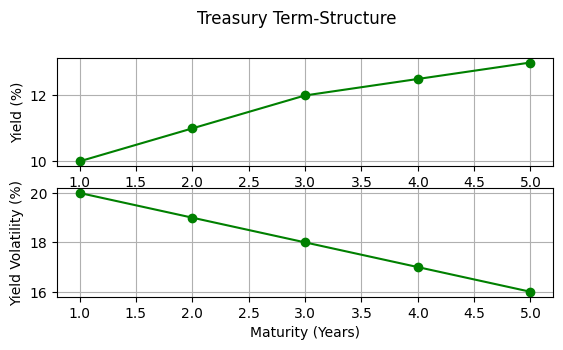

In [4]:
# Visualize it
plt.subplot(3, 1, 1)
plt.plot(term_struct.mat, term_struct.yld * 100, 'g-o')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(term_struct.mat, term_struct.vol * 100, 'g-o')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield Volatility (%)')
plt.suptitle('Treasury Term-Structure')
plt.grid(True)

Fit the model to the term structure

In [5]:
# Instantiate and calibrate model
BDT = BlackDermanToy(term_struct)

# Visualize the rate tree
print(BDT.rate_tree)

[[0.1        0.14318047 0.19418721 0.21788759 0.25524583]
 [0.         0.0979156  0.13766869 0.16055158 0.19476734]
 [0.         0.         0.09759998 0.11830325 0.14861875]
 [0.         0.         0.         0.08717235 0.11340471]
 [0.         0.         0.         0.         0.08653436]]


## Pricing with the Model
Visualize a price curve for zeroes over maturity

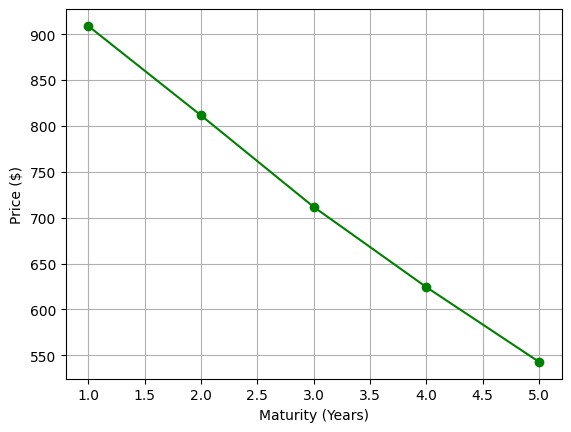

In [6]:
# Build the curve
maturities = term_struct.mat.to_numpy()
prices = np.zeros(len(maturities))
for i_col in range(np.size(prices, 0)):
    prices[i_col], _ = BDT.quote_zero(maturities[i_col], 1000)

# Plot
plt.plot(maturities, prices, 'g-o')
plt.xlabel('Maturity (Years)')
plt.ylabel('Price ($)')
plt.grid(True)

Visualize a price surface for treasuries over maturity and coupon

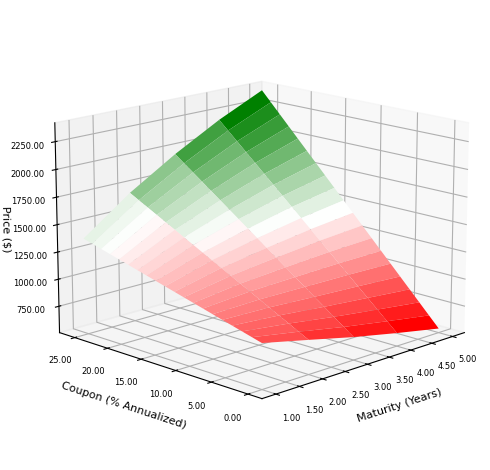

In [7]:
# Build the surface
rate_vec = np.linspace(np.min(BDT.rate_tree), np.max(BDT.rate_tree), 20)
maturity_vec = term_struct.mat.to_numpy()
rates, maturities = np.meshgrid(rate_vec, maturity_vec)
prices = np.zeros((len(maturity_vec),len(rate_vec)))
for i_row in range(np.size(prices, 0)):
    for i_col in range(np.size(prices, 1)):
        prices[i_row, i_col], _ = BDT.quote_tbond(maturities[i_row, i_col], 1000, rates[i_row, i_col], 2)

# Plot
cmap = LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N=256)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(maturities, rates*100, prices, cmap=cmap)
plt.xlabel('Maturity (Years)', fontsize='8')
plt.ylabel('Coupon (% Annualized)', fontsize='8')
ax.set_zlabel('Price ($)', fontsize='8', labelpad=0)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.zaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.view_init(azim=225, elev=15)
plt.tight_layout()

Visualize a price surface for american calls on a 5 year treasury over time-to-expiry and strike

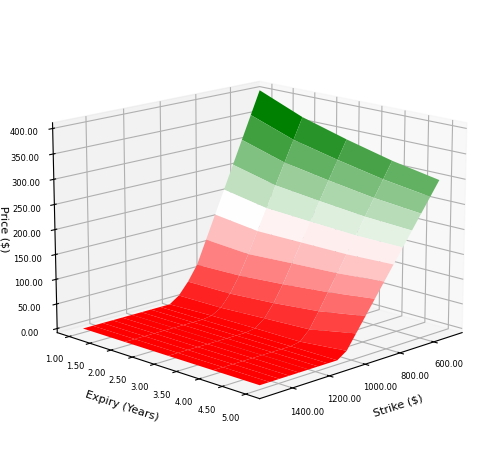

In [8]:
# Build the surface
strike_vec = np.linspace(500, 1500, 20)
expiries_vec = term_struct.mat.to_list()
expiries, strikes = np.meshgrid(expiries_vec, strike_vec)
prices = np.zeros((len(strike_vec),len(expiries_vec)))
for i_row in range(np.size(prices, 0)):
    for i_col in range(np.size(prices, 1)):
        prices[i_row, i_col] = BDT.quote_toption(maturity=5, par=1000, coupon=0.05, option_expiration=expiries[i_row, i_col], strike=strikes[i_row, i_col], is_call=True, is_american=True)

# Plot
cmap = LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N=256)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(strikes, expiries, prices, cmap=cmap)
plt.xlabel('Strike ($)', fontsize='8')
plt.ylabel('Expiry (Years)', fontsize='8')
ax.set_zlabel('Price ($)', fontsize='8', labelpad=0)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.zaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.view_init(azim=45, elev=15)
plt.tight_layout()

Visualize a price surface for american puts on a 5 year treasury over time-to-expiry and strike

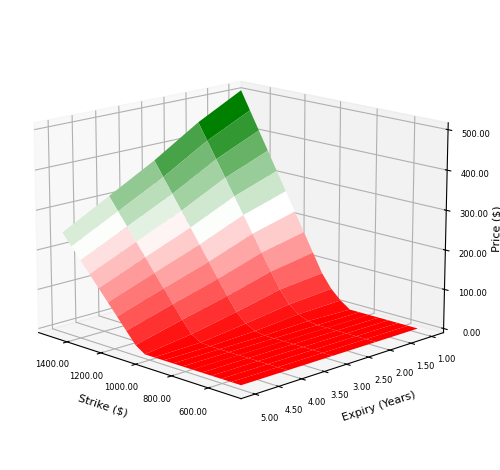

In [9]:
# Build the surface
strike_vec = np.linspace(500, 1500, 20)
expiries_vec = term_struct.mat.to_list()
expiries, strikes = np.meshgrid(expiries_vec, strike_vec)
prices = np.zeros((len(strike_vec),len(expiries_vec)))
for i_row in range(np.size(prices, 0)):
    for i_col in range(np.size(prices, 1)):
        prices[i_row, i_col] = BDT.quote_toption(maturity=5, par=1000, coupon=0.05, option_expiration=expiries[i_row, i_col], strike=strikes[i_row, i_col], is_call=False, is_american=True)

# Plot
cmap = LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N=256)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(strikes, expiries, prices, cmap=cmap)
plt.xlabel('Strike ($)', fontsize='8')
plt.ylabel('Expiry (Years)', fontsize='8')
ax.set_zlabel('Price ($)', fontsize='8', labelpad=0)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.zaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.view_init(azim=135, elev=15)
plt.tight_layout()

# Conclusions
- The price (P) curve for the zeros looks as I'd expect, with all bonds being priced at an increasing discount to par with maturity (M).
- The treasury curve is more interesting:
    - At a coupon (C) of zero, the price surface approaches the zero coupon bond curve as expected, with a consistently negative value of $\frac{dP}{dM}$.
    - As coupon increases, $\frac{dP}{dM}$ increases as the owner is compensated more by the coupons and requires less compensation from capital appreciation.
    - $\frac{dP}{dC}$ is consistently positive as higher coupon cashflows are incorporated into the price of the bond.
- The treasury option curves are even more interesting:
    - At first glance they approximate the familiar P&L shape that might yield from Black-Scholes.
    - However, upon closer inspection a few things pop out that are strange:
        - Deep out of the money options are priced at zero.
            - Clearly this isn't economically rational, as if max loss is premium paid and there is any chance of the option expiring in the money, the expected payoff, and thus fair price, must be positive.
            - I believe this is because the model as it stands uses a binomial tree that is necessarily finite. It also assumes that term-structure is invariant. 
            - Thus, I believe that the model is functionally Winsorizing the distribution of rates such that some options have no chance of expiring in the money as rates are not assumed to vary enough to allow the 
            underlying bond price to cross through the strike.
        - Looking across curves of time-to-expiry (E) $\frac{dP}{dE}$ is negative, and increasingly so as the options are deeper in the money.
            - This is a phenomenon that I wouldn't expect.
            - Some things I think might be contributing to this include:
                - The fact that the options being priced are European.
                - The fact that the owner of the option does not receive the coupon, and thus an option holder who exercises later receives less coupon cashflow and depends more on capital appreciation.
            - I'll have to research this further to figure out if it makes sense.